In [122]:
import pandas as pd

In [123]:
# https://www.kaggle.com/code/andrezaza/massive-rotten-tomatoes-eda

data = pd.read_csv('rotten_tomatoes_movies.csv')
data

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,writer,boxOffice,distributor,soundMix
0,space-zombie-bingo,Space Zombie Bingo!,50.0,NaN,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,George Ormrod,"George Ormrod,John Sabotta",NaN,NaN,NaN
1,the_green_grass,The Green Grass,NaN,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Tiffany Edwards,Tiffany Edwards,NaN,NaN,NaN
2,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,NaN,NaN,120.0,Drama,Korean,"Park Heung-Sik,Heung-Sik Park","Ha Young-Joon,Jeon Yun-su,Song Hye-jin",NaN,NaN,NaN
3,the_sore_losers_1997,Sore Losers,60.0,NaN,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,John Michael McCarthy,John Michael McCarthy,NaN,NaN,NaN
4,dinosaur_island_2002,Dinosaur Island,70.0,NaN,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Will Meugniot,John Loy,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,nadia_the_secret_of_blue_water_the_motion_pict...,Nadia: The Secret of Blue Water: The Motion Pi...,14.0,NaN,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,Sho Aono,Kaoru Umeno,NaN,ADV Films,NaN
143254,everyone_i_knew_and_loved,Everyone I Knew and Loved,NaN,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Andrew Behringer,Erika Heidewald,NaN,NaN,NaN
143255,the-human-body,The Human Body,71.0,89.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Peter Georgi,Richard Dale,NaN,NaN,NaN
143256,flying_fists,Flying Fists,NaN,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Robert F. Hill,"Robert F. Hill,Basil Dickey",NaN,NaN,NaN


In [124]:
# Ahora renombraremos el nombre de las columnas, solo haremos que esten en minusculas y en caso de haber
# un espacio lo remplazaremos con un _ .

data.columns = [col.replace(" ", "_").lower() for col in data]
data.columns

Index(['id', 'title', 'audiencescore', 'tomatometer', 'rating',
       'ratingcontents', 'releasedatetheaters', 'releasedatestreaming',
       'runtimeminutes', 'genre', 'originallanguage', 'director', 'writer',
       'boxoffice', 'distributor', 'soundmix'],
      dtype='object')

In [125]:
# Revisamos y eliminamos las filas duplicadas

duplicados = data.duplicated()
num_dupl = duplicados.sum()
print(f"Hay {num_dupl} de filas dublicadas")

Hay 1204 de filas dublicadas


In [126]:
data = data.drop_duplicates()

In [127]:
duplicados = data.duplicated()
num_dupl = duplicados.sum()
print(f"Hay {num_dupl} de filas duplicadas")

Hay 0 de filas duplicadas


In [128]:
# data = data.drop('id', axis=1)
# data = data.drop('title', axis=1)
# data = data.drop('releasedatestreaming', axis=1)
# data = data.drop('soundmix', axis =1)

# R2_LR:   0.39134938177375944    R2_KNR:   0.4802528536135826

In [129]:
nulls_p = (data.isna().sum()/len(data))*100
nulls_p = nulls_p.reset_index()
nulls_p.columns=["Columna", "Porcentaje"]
nulls_p

,Columna,Porcentaje
0,id,0.000000
1,title,0.258352
2,audiencescore,48.872964
3,tomatometer,76.365326
4,rating,90.243147
5,ratingcontents,90.243147
6,releasedatetheaters,78.520844
7,releasedatestreaming,44.577414
8,runtimeminutes,9.656187
9,genre,7.744238


In [130]:
data = data.dropna()

In [131]:
data.head()

,id,title,audiencescore,tomatometer,rating,ratingcontents,releasedatetheaters,releasedatestreaming,runtimeminutes,genre,originallanguage,director,writer,boxoffice,distributor,soundmix
88,monsoon_wedding,Monsoon Wedding,87.0,95.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,2002-09-24,100.0,"Comedy, Drama",English,Mira Nair,Sabrina Dhawan,$13.9M,USA Films,"Dolby Stereo, Dolby Digital, Dolby A, Surround..."
146,robin_hood_2018,Robin Hood,40.0,15.0,PG-13,"['Extended Sequences of Violence', 'Action', '...",2018-11-21,2019-02-19,118.0,"Action, Adventure",English,Otto Bathurst,"Ben Chandler,David James Kelly",$30.8M,Lionsgate Films,Dolby Atmos
151,my_giant,My Giant,25.0,21.0,PG,"['Violence', 'Language', 'Brief Crude Humor']",1998-04-10,1998-09-29,103.0,"Comedy, Drama",English,Michael Lehmann,"Billy Crystal,David Seltzer,David Seltzer",$8.0M,Columbia Pictures,"SDDS, Dolby SR, Dolby Digital, Surround, Dolby..."
273,west_side_story_2021,West Side Story,93.0,91.0,PG-13,"['Some Strong Violence', 'Brief Smoking', 'Str...",2021-12-10,2022-03-02,156.0,"Musical, Romance",English,Steven Spielberg,Tony Kushner,$38.5M,20th Century Studios,"Dolby Digital, Dolby Atmos"
308,youth_2015,Youth,69.0,71.0,R,"['Language', 'Graphic Nudity', 'Some Sexuality']",2015-12-04,2016-03-01,118.0,Drama,English,Paolo Sorrentino,Paolo Sorrentino,$2.7M,Fox Searchlight,Dolby Atmos


In [132]:
nulls_p = (data.isna().sum()/len(data))*100
nulls_p = nulls_p.reset_index()
nulls_p.columns=["Columna", "Porcentaje"]
nulls_p

,Columna,Porcentaje
0,id,0.0
1,title,0.0
2,audiencescore,0.0
3,tomatometer,0.0
4,rating,0.0
5,ratingcontents,0.0
6,releasedatetheaters,0.0
7,releasedatestreaming,0.0
8,runtimeminutes,0.0
9,genre,0.0


In [133]:
duplicados = data.duplicated()
sum_dupl = duplicados.sum()
print (f'Hay {sum_dupl} filas dpulicadas')

Hay 0 filas dpulicadas


In [134]:
# Utilizamos una expresión regular para reemplazar todos los caracteres no numéricos por una 
# cadena vacía
data['boxoffice'] = data['boxoffice'].str.replace('[^0-9.]', '')

# Convertimos la columna a un tipo de dato numérico
data['boxoffice'] = pd.to_numeric(data['boxoffice'])
data['boxoffice'].head()

C:\Users\SPARTAN PC\AppData\Local\Temp\ipykernel_35428\3817629430.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data['boxoffice'] = data['boxoffice'].str.replace('[^0-9.]', '')


88     13.9
146    30.8
151     8.0
273    38.5
308     2.7
Name: boxoffice, dtype: float64

In [135]:
100*data['distributor'].value_counts()/len(data['distributor'])

Warner Bros. Pictures                                   8.891753
Universal Pictures                                      8.505155
Paramount Pictures                                      7.474227
20th Century Fox                                        7.345361
Sony Pictures Entertainment                             5.057990
                                                          ...   
Amazon Studios, Lionsgate Films                         0.032216
Chicago Releasing                                       0.032216
Summit Entertainment, Artisan Entertainment             0.032216
Icon Entertainment International, Paramount Pictures    0.032216
United Artists, IFC Films                               0.032216
Name: distributor, Length: 350, dtype: float64

In [136]:
# Eliminar los valores después de la coma en las columnas
"""
data['genre'] = data['genre'].apply(lambda x: x.split(',')[0])
data['director'] = data['director'].apply(lambda x: x.split(',')[0])
data['writer'] = data['writer'].apply(lambda x: x.split(',')[0])
data['distributor'] = data['distributor'].apply(lambda x: x.split(',')[0])
"""
# R2_LR:  0.5040983038991249      R2_KNR:   0.48136071332086494   

"\ndata['genre'] = data['genre'].apply(lambda x: x.split(',')[0])\ndata['director'] = data['director'].apply(lambda x: x.split(',')[0])\ndata['writer'] = data['writer'].apply(lambda x: x.split(',')[0])\ndata['distributor'] = data['distributor'].apply(lambda x: x.split(',')[0])\n"

In [137]:
100*data['ratingcontents'].value_counts()/len(data['ratingcontents'])

['Language']                                                                                              2.126289
['Sexual Content', 'Language']                                                                            1.320876
['Violence', 'Language']                                                                                  0.934278
['Brief Strong Language']                                                                                 0.612113
['Some Language']                                                                                         0.483247
                                                                                                            ...   
['Some Rude Humor', 'Mild Action/Violence']                                                               0.032216
['Drug Material', 'Domestic Abuse', 'Some Violence', 'Language', 'Mature Thematic Content', 'Smoking']    0.032216
['Partying', 'Brief Language', 'Sexual Content', 'Smoking', 'Some Violent Images

In [138]:
# Dejar solo la primer palabra 

# data['ratingcontents'] = data['ratingcontents'].apply(lambda x: x.split(",")[0].strip("[ '"))

# R2_LR:   -0.23212263286784207     R2_KNR:    0.4791587139502429 

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3104 entries, 88 to 143250
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3104 non-null   object 
 1   title                 3104 non-null   object 
 2   audiencescore         3104 non-null   float64
 3   tomatometer           3104 non-null   float64
 4   rating                3104 non-null   object 
 5   ratingcontents        3104 non-null   object 
 6   releasedatetheaters   3104 non-null   object 
 7   releasedatestreaming  3104 non-null   object 
 8   runtimeminutes        3104 non-null   float64
 9   genre                 3104 non-null   object 
 10  originallanguage      3104 non-null   object 
 11  director              3104 non-null   object 
 12  writer                3104 non-null   object 
 13  boxoffice             3104 non-null   float64
 14  distributor           3104 non-null   object 
 15  soundmix          

In [140]:
# Eliminamos columnas que no necesitaremos o creamos poco relvantes 
# 
data = data.drop('id', axis=1)
data = data.drop('title', axis=1)
data = data.drop('releasedatestreaming', axis=1)
data = data.drop('soundmix', axis =1)
data_movie = data.drop('tomatometer', axis=1)

In [141]:
data_movie.head()

,audiencescore,rating,ratingcontents,releasedatetheaters,runtimeminutes,genre,originallanguage,director,writer,boxoffice,distributor
88,87.0,R,"['Some Sex Related Dialogue', 'Language']",2002-02-22,100.0,"Comedy, Drama",English,Mira Nair,Sabrina Dhawan,13.9,USA Films
146,40.0,PG-13,"['Extended Sequences of Violence', 'Action', '...",2018-11-21,118.0,"Action, Adventure",English,Otto Bathurst,"Ben Chandler,David James Kelly",30.8,Lionsgate Films
151,25.0,PG,"['Violence', 'Language', 'Brief Crude Humor']",1998-04-10,103.0,"Comedy, Drama",English,Michael Lehmann,"Billy Crystal,David Seltzer,David Seltzer",8.0,Columbia Pictures
273,93.0,PG-13,"['Some Strong Violence', 'Brief Smoking', 'Str...",2021-12-10,156.0,"Musical, Romance",English,Steven Spielberg,Tony Kushner,38.5,20th Century Studios
308,69.0,R,"['Language', 'Graphic Nudity', 'Some Sexuality']",2015-12-04,118.0,Drama,English,Paolo Sorrentino,Paolo Sorrentino,2.7,Fox Searchlight


In [142]:
data_movie['releasedatetheaters'] = pd.to_datetime(data['releasedatetheaters'])
data_movie['month'] = data_movie['releasedatetheaters'].dt.month
data_movie['year'] = data_movie['releasedatetheaters'].dt.year
data_movie = data_movie.drop('releasedatetheaters', axis=1)

In [143]:
data_movie.head()

,audiencescore,rating,ratingcontents,runtimeminutes,genre,originallanguage,director,writer,boxoffice,distributor,month,year
88,87.0,R,"['Some Sex Related Dialogue', 'Language']",100.0,"Comedy, Drama",English,Mira Nair,Sabrina Dhawan,13.9,USA Films,2,2002
146,40.0,PG-13,"['Extended Sequences of Violence', 'Action', '...",118.0,"Action, Adventure",English,Otto Bathurst,"Ben Chandler,David James Kelly",30.8,Lionsgate Films,11,2018
151,25.0,PG,"['Violence', 'Language', 'Brief Crude Humor']",103.0,"Comedy, Drama",English,Michael Lehmann,"Billy Crystal,David Seltzer,David Seltzer",8.0,Columbia Pictures,4,1998
273,93.0,PG-13,"['Some Strong Violence', 'Brief Smoking', 'Str...",156.0,"Musical, Romance",English,Steven Spielberg,Tony Kushner,38.5,20th Century Studios,12,2021
308,69.0,R,"['Language', 'Graphic Nudity', 'Some Sexuality']",118.0,Drama,English,Paolo Sorrentino,Paolo Sorrentino,2.7,Fox Searchlight,12,2015


<AxesSubplot:>

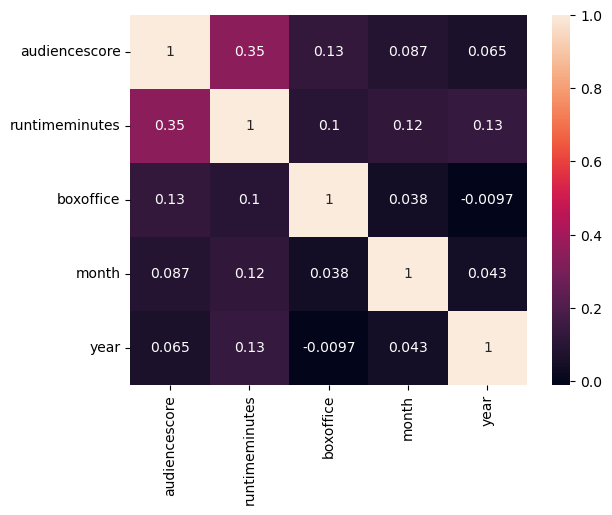

In [144]:
import seaborn as sns

corr_matrix=data_movie.corr()
sns.heatmap(corr_matrix,annot=True)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

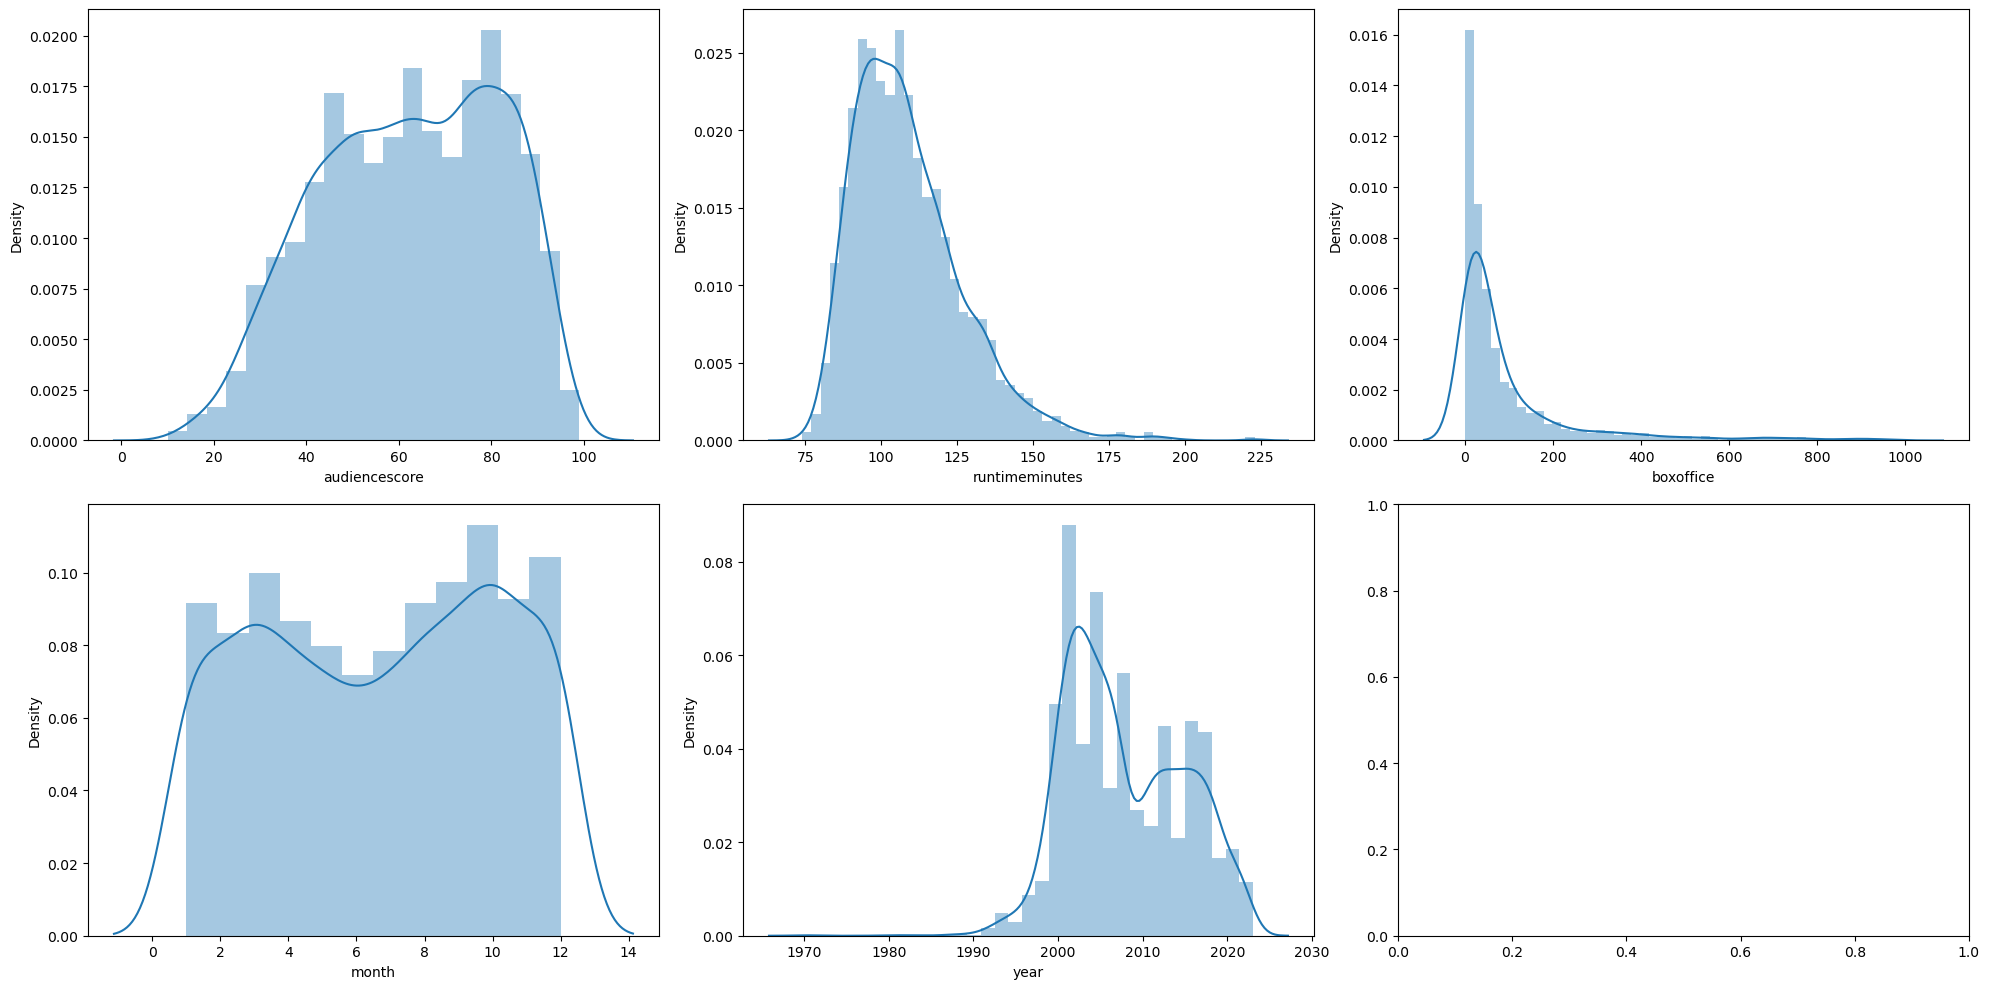

In [145]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

sns.distplot(data_movie['audiencescore'], ax=axs[0, 0])
sns.distplot(data_movie['runtimeminutes'], ax=axs[0, 1])
sns.distplot(data_movie['boxoffice'], ax=axs[0, 2])
sns.distplot(data_movie['month'], ax=axs[1, 0])
sns.distplot(data_movie['year'], ax=axs[1, 1])

plt.tight_layout()
plt.show()

In [146]:
import numpy as np

numerical_data = data_movie.select_dtypes(include = np.number)
categorical_data = data_movie.select_dtypes(include = 'object')

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

<AxesSubplot:ylabel='Density'>

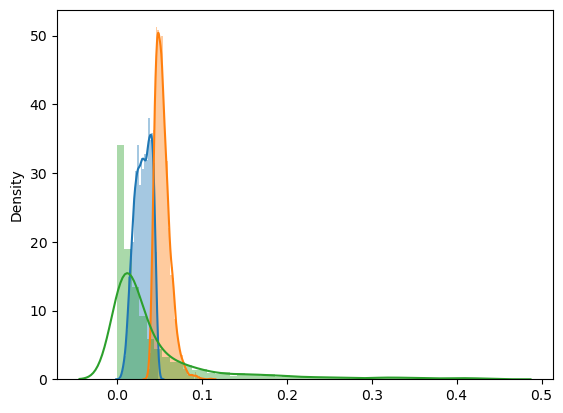

In [147]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(numerical_data)
x_normalizer = transformer.transform(numerical_data)

sns.distplot(x_normalizer.T[0])
sns.distplot(x_normalizer.T[1])
sns.distplot(x_normalizer.T[2])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

<AxesSubplot:ylabel='Density'>

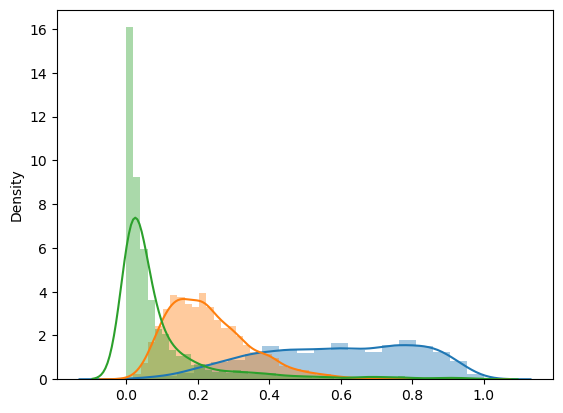

In [148]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(numerical_data)
x_minmax = transformer.transform(numerical_data)
sns.distplot(x_minmax.T[0])
sns.distplot(x_minmax.T[1])
sns.distplot(x_minmax.T[2])

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

<AxesSubplot:ylabel='Density'>

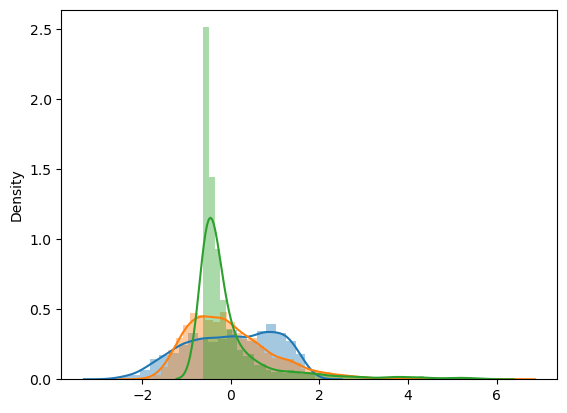

In [149]:
from sklearn.preprocessing import StandardScaler
# Aqui vemos las graficas y los datos se comportan mejor con standardscaler por lo que es el que usaremos
# por ahora

transformer = StandardScaler().fit(numerical_data)
x_StaSca = transformer.transform(numerical_data)
sns.distplot(x_StaSca.T[0])
sns.distplot(x_StaSca.T[1])
sns.distplot(x_StaSca.T[2])

In [150]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder().fit(categorical_data)
encoded = encoder.transform(categorical_data).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [151]:
from sklearn.preprocessing import LabelEncoder

lebel = categorical_data.apply(LabelEncoder().fit_transform)
lebel 

,rating,ratingcontents,genre,originallanguage,director,writer,distributor
88,3,1882,127,8,1081,2166,300
146,2,294,1,8,1150,207,144
151,1,2337,127,8,1040,226,55
273,2,2014,389,8,1455,2475,10
308,3,861,174,8,1155,1873,110
...,...,...,...,...,...,...,...
143000,1,1785,424,8,986,857,315
143008,3,863,424,8,1046,1727,332
143012,2,1877,174,8,198,1086,69
143025,3,757,174,8,3,1117,187


In [161]:
data_transformed = np.concatenate([encoded,x_StaSca],axis=1)
data_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -0.53426882,
        -1.32608807, -0.83170429],
       [ 0.        ,  0.        ,  1.        , ..., -0.42518996,
         1.21895153,  1.47330474],
       [ 0.        ,  1.        ,  0.        , ..., -0.5723496 ,
        -0.76052372, -1.40795655],
       ...,
       [ 0.        ,  0.        ,  1.        , ..., -0.59235815,
         0.65338717, -2.27233494],
       [ 0.        ,  0.        ,  0.        , ..., -0.26641245,
        -1.60887025, -0.97576735],
       [ 0.        ,  0.        ,  1.        , ..., -0.56331348,
         0.93616935,  0.60892636]])

In [155]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train,x_test,y_train,y_test = train_test_split(data_transformed,data["tomatometer"],test_size=0.2,random_state=19) 
lm=linear_model.LinearRegression().fit(x_train,y_train)
predictions=lm.predict(x_train)

In [156]:
predictions

array([45.21605002, 10.75089301, 72.11160023, ..., 53.25603035,
       71.83635165, 66.98966694])

In [157]:
y_train

140994    43.0
109315    10.0
133740    87.0
52884     74.0
7409      93.0
          ... 
43905      8.0
64320     12.0
36872     14.0
122776    91.0
76699     73.0
Name: tomatometer, Length: 2483, dtype: float64

In [158]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error, mean_absolute_error
r2_score(y_train,predictions)

0.509417998470322

In [162]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

def models_train(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.4, random_state =100)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions_LR = model.predict(x_test)
    score_LR = model.score(x_test, y_test)
    
    model = KNeighborsRegressor(n_neighbors=30)  
    model.fit(x_train, y_train)
    predictions_KNR = model.predict(x_test)
    score_KNR = model.score(x_test, y_test)
    
    return (score_LR, score_KNR)

In [163]:
R2_LR, R2_KNR = models_train(data_transformed,data["tomatometer"])
print(R2_LR, R2_KNR)

0.5170461180537427 0.4886337608672858


In [ ]:
# Con audiencescore R2: 0.5170461180537427  KNR: 0.4886337608672858
# Sin 0.24092016599054966 KNR: 0.2109903501563366
# Usando audiencescore como target 0.48183961425919597  KNR: 0.49359916655339753
# Sin tomatometer R2: 0.18662891764579137    KNR: 0.2239738028641448

In [ ]:
"""

from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_transformed,data["tomatometer"], test_size = 0.4, random_state =100)
regr = MLPRegressor(max_iter=500).fit(X_train, y_train)
regr.predict(X_test)

regr_score = regr.score(X_test, y_test)
regr_score

"""

In [ ]:
# data_movie.to_csv('data_movie_clean.csv')
# https://gonzalezgouveia.com/como-exportar-data-frames-de-pandas-a-csv-o-excel-en-python/